# Initial Project

## Reading the data into Python

We start by opening the files and loading them into a Numpy array

In [1]:
import h5py
import pandas
import numpy as np

def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/') [0]
        return pandas.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('train')
test  = load_data('test')

all_features = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

X = train[all_features]
y_true = train['Truth']
y_energy = train['p_truth_E']
X_test = test[all_features]

In [2]:
X_electron = X[y_true == 1]
X_not_electron = X[y_true == 0]

y_energy_electron = y_energy[y_true == 1]
y_energy_not_electron = y_energy[y_true == 0]

# Regression


In [3]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Random seed
import random
random.seed(2)

### Splitting the data into test data and validation data

In [4]:
Train, Val, _, _ = train_test_split(train, train['Truth'], test_size=0.15)

In [5]:
# Train data
X_train = Train[all_features]       # all features
y_train_energy = Train['p_truth_E'] # energy as float
y_train_truth = Train['Truth']      # 1 or 0

X_train_electron = X_train[y_train_truth == 1]
y_train_electron = y_train_energy[y_train_truth == 1]


# Validation data
X_val = Val[all_features]
y_val_energy = Val['p_truth_E']
y_val_truth = Val['Truth']

# Validation data seperated in electron and not electron for feature selection
X_val_electron = X_val[y_val_truth == 1]
X_val_notelectron = X_val[y_val_truth == 0]
y_val_electron = y_val_energy[y_val_truth == 1]
y_val_notelectron = y_val_energy[y_val_truth == 0]

# What features to use?

In [6]:
from scipy.stats import pearsonr, spearmanr, kendalltau

def p_s_k_correlation(x, y):
    '''Pearson r, Spearman r, Kendall Tau correlations coeffeficients'''
    
    r_p, p_p = pearsonr(x, y)   # measures linear correlation
    r_s, p_s = spearmanr(x, y)  # measures rank correlation (monotonic function)
    r_k, p_k = kendalltau(x, y) # measures rank correlation
    
    return r_p, r_s, r_k

In [7]:
good = ['p_eCluster', 'p_rawECluster', 'p_eClusterLr2', 'p_eAccCluster', 'p_cellIndexCluster',
        'p_numberOfTRTHits', 'p_E7x7_Lr2', 'p_E_Lr2_MedG', 'p_e235', 'p_e255', 'p_ecore',
       'p_maxEcell_energy', 'p_nCells_Lr1_HiG', 'p_r33over37allcalo', 'p_e233', 'p_e237', 'p_e277', 'p_E3x5_Lr2',
       'p_E5x7_Lr2', 'p_E7x11_Lr2']

ok =   ['p_nTracks', 'p_qOverP', 'p_d0', 'p_EptRatio', 'p_z0theta', 'p_eClusterLr1', 'p_ndof', 'p_E_Lr1_MedG',
       'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_e1152', 'p_e132', 'p_topoetconecoreConeEnergyCorrection',
       'p_topoetconecoreConeSCEnergyCorrection', 'p_emaxs1', 'p_numberOfTRTXenonHits']

bad =  ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu',
       'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge',
        'p_z0', 'p_sigmad0', 'p_d0Sig', 'p_dPOverP', 'p_etaCluster', 'p_phiCluster', 'p_rawECluster', 
        'p_rawPhiCluster', 'p_eClusterLr0', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2',
        'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 
        'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 
        'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits',
        'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_chi2', 'p_SharedMuonTrack', 'p_E7x7_Lr3', 'p_E_Lr0_HiG',
        'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_LowG', 'p_E_Lr1_HiG', 'p_eTileGap3Cluster'
        'p_E_Lr1_LowG', 'p_E_Lr2_LowG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 
        'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 
        'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 
        'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e2ts1', 'p_emins1', 'p_etconeCorrBitset',
        'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 
        'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 
        'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG',
        'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2',
        'p_ptconeCorrBitset', 'p_ptconeCorrBitset', 'p_topoetconeCorrBitset', 'p_weta1', 'p_widths1', 'p_widths2', 
        'p_wtots1', 'p_e2tsts1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr3', 'p_E5x7_Lr0',
        'p_E5x7_Lr1', 'p_E3x5_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr3', 'p_E7x7_Lr0','p_E7x7_Lr1']

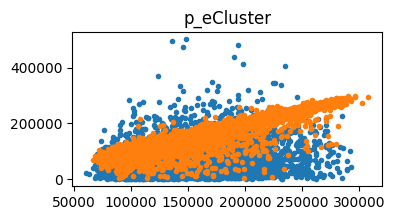

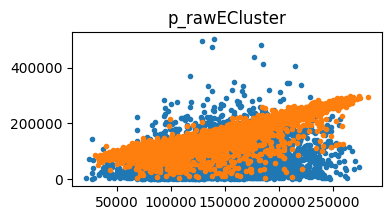

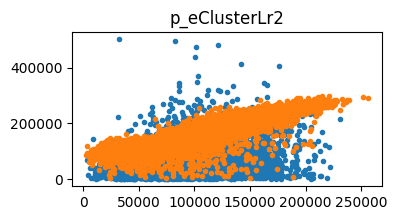

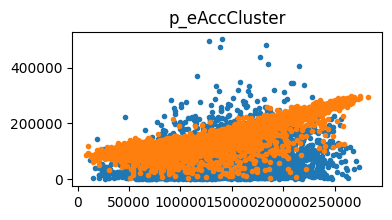

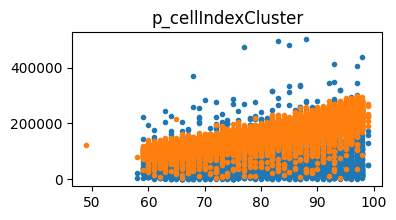

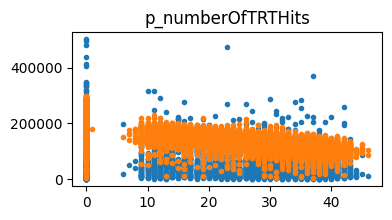

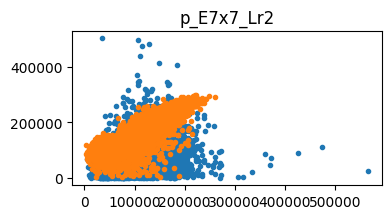

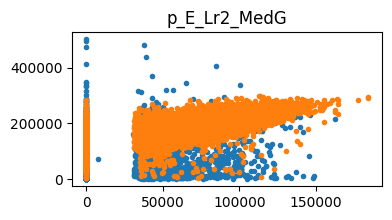

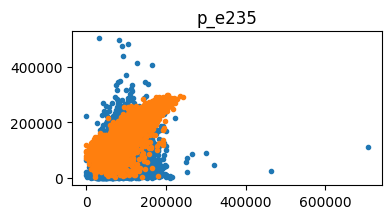

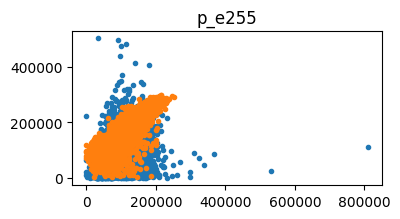

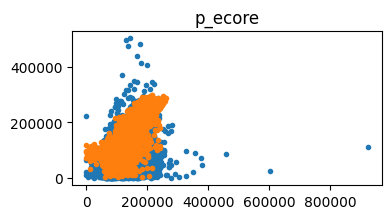

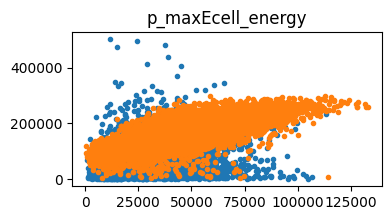

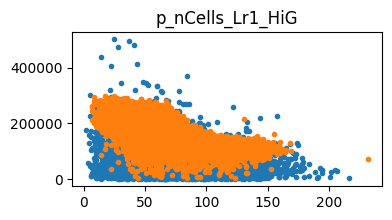

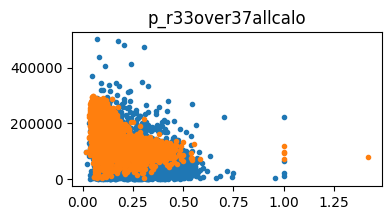

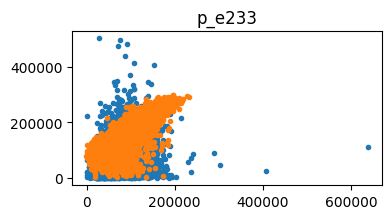

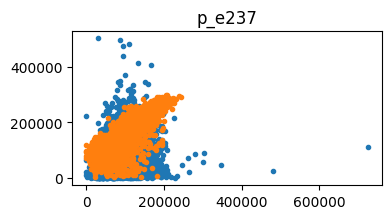

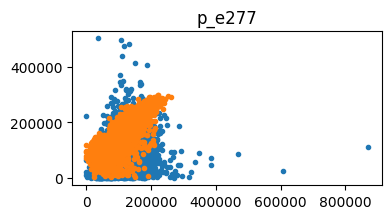

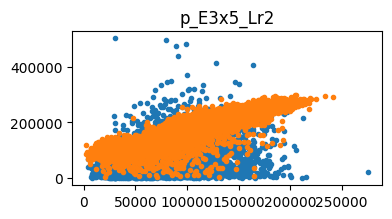

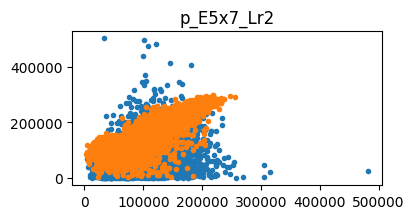

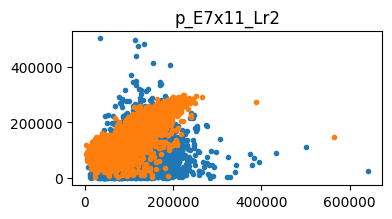

In [8]:
for i in range(len(good)):
    plt.figure(figsize=(4,2))
    plt.title(good[i])
    plt.plot(X_val_notelectron[good[i]], y_val_notelectron, '.')
    plt.plot(X_val_electron[good[i]], y_val_electron, '.')

In [9]:
def corr_plot(df, ax, title):
    '''Correlation plot'''
    sns.heatmap(df.corr(), mask=np.zeros_like(df.corr(), dtype=bool), cbar_kws={"shrink": 0.65},
            cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1.0, vmax=1.0, square=True, ax=ax)
    ax.set_title(title)

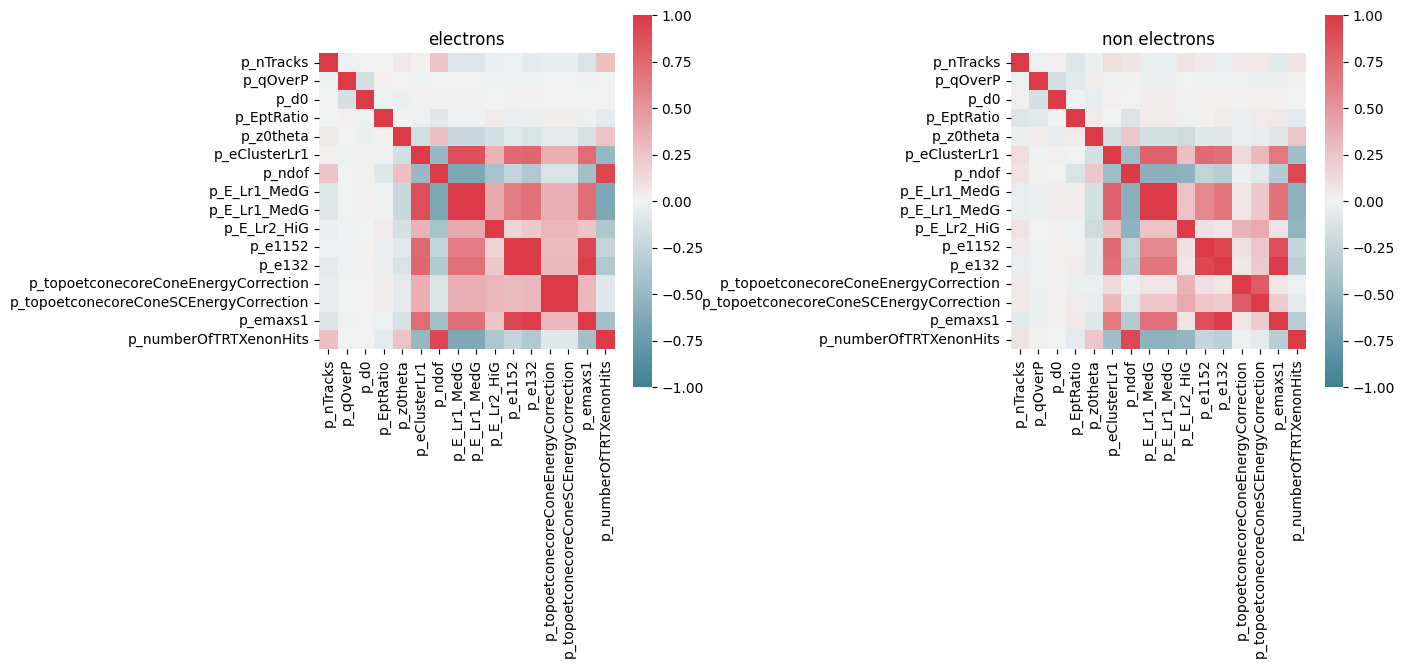

In [10]:
# Make two separate correlation plots, also to see differences:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
corr_plot(X_val_electron[ok], ax[0], 'electrons')
corr_plot(X_val_notelectron[ok], ax[1], 'non electrons')
fig.tight_layout();

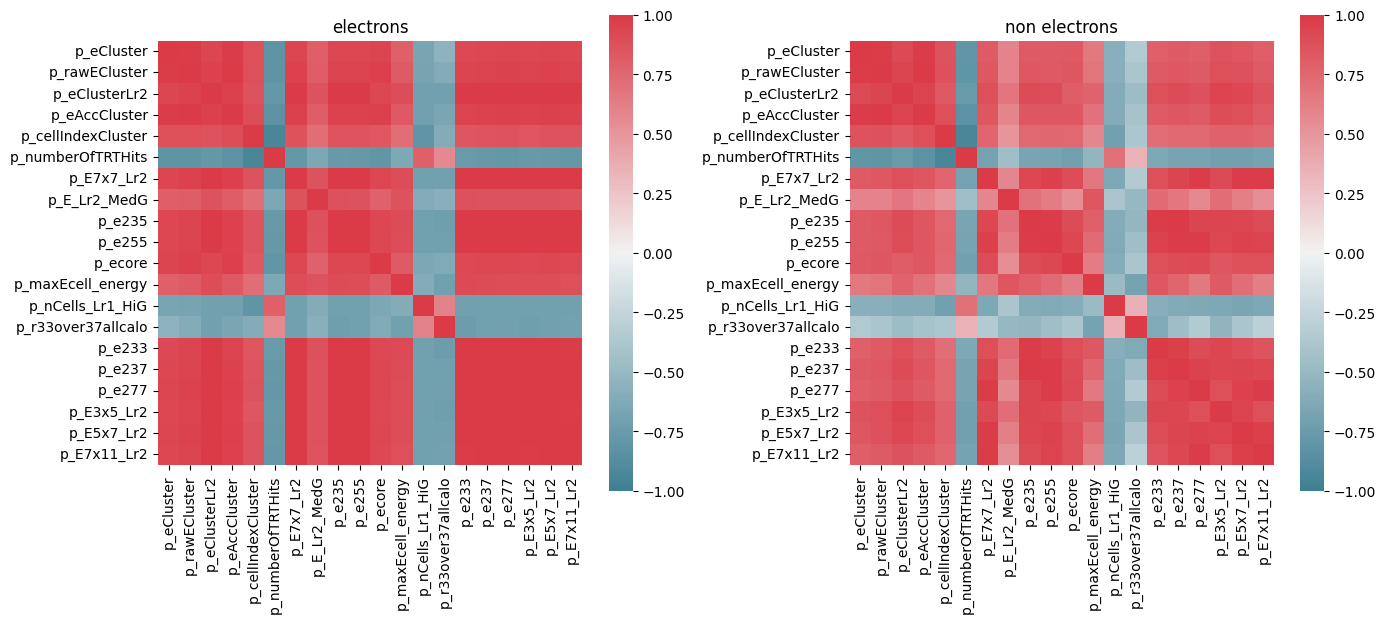

In [11]:
# Make two separate correlation plots, also to see differences:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
corr_plot(X_val_electron[good], ax[0], 'electrons')
corr_plot(X_val_notelectron[good], ax[1], 'non electrons')
fig.tight_layout();

# Simple regression tree

In [12]:
def MAE(y_pred, y_true):
    return (y_pred-y_true)/y_true

def MAE_abs(y_pred, y_true):
    return abs((y_pred-y_true)/y_true)

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_curve, auc, explained_variance_score, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

In [14]:
reg = DecisionTreeRegressor(max_depth = 18, min_samples_split = 100) 
reg.fit(X_train_electron[good], y_train_electron)

DecisionTreeRegressor(max_depth=18, min_samples_split=100)

In [15]:
print('Depth =', reg.get_depth())
print('N leaves =', reg.get_n_leaves())

Depth = 18
N leaves = 1790


In [16]:
y_val_pred = reg.predict(X_val[good])
y_val_electron_pred = reg.predict(X_val_electron[good])
y_val_notelectron_pred = reg.predict(X_val_notelectron[good])

In [17]:
print('Score train data = ', reg.score(X_train_electron[good], y_train_electron))
print('Score validation data = ', reg.score(X_val_electron[good], y_val_electron))
print('Explained variance score validation data = ', explained_variance_score(y_val_electron_pred, y_val_electron))
print('R2 score validation data = ', r2_score(y_val_electron_pred, y_val_electron))
print('Mean MAE', np.mean(MAE_abs(y_val_electron_pred, y_val_electron)), 'pm', 
      np.std(MAE_abs(y_val_electron_pred, y_val_electron)))

Score train data =  0.9266559974151761
Score validation data =  0.8797936603974372
Explained variance score validation data =  0.8719350084118234
R2 score validation data =  0.8719297028862969
Mean MAE 0.08327505235425882 pm 0.652502408257037


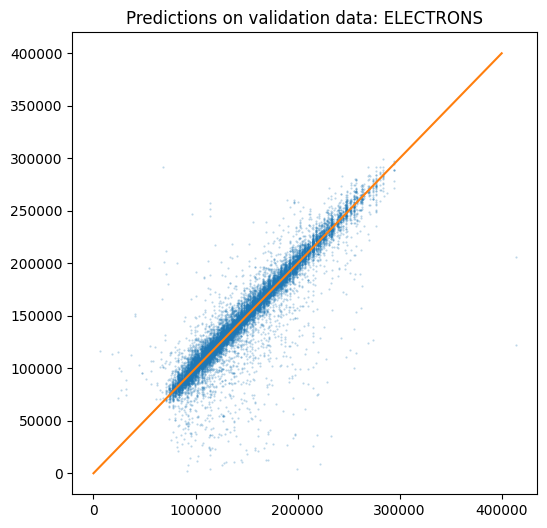

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.set(title='Predictions on validation data: ELECTRONS')
ax.plot(y_val_electron_pred, y_val_electron, '.', ms=1, alpha=0.3)
ax.plot([0, 4e5], [0, 4e5])

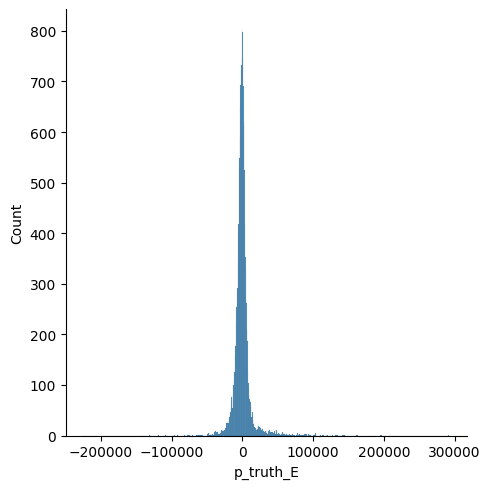

In [19]:
import seaborn as sns
sns.displot((y_val_electron_pred-y_val_electron))

# New features

In [20]:
good_reduced = ['p_eCluster', 'p_qOverP', 'p_d0',  'p_rawECluster', 'p_eClusterLr2', 'p_eAccCluster', 'p_cellIndexCluster',
        'p_numberOfTRTHits', 'p_E7x7_Lr2', 'p_E_Lr2_MedG', 'p_e235', 'p_ecore',
       'p_maxEcell_energy', 'p_nCells_Lr1_HiG', 'p_r33over37allcalo', 'p_e233', 'p_e237', 'p_e277',
       'p_E5x7_Lr2']

#good_reduced = all_features_sorted[:N_features]

reg2 = DecisionTreeRegressor(max_depth = 17, min_samples_split = 40) 
reg2.fit(X_train_electron[good_reduced], y_train_electron)

DecisionTreeRegressor(max_depth=17, min_samples_split=40)

In [21]:
y_val_pred = reg2.predict(X_val[good_reduced])
y_val_electron_pred = reg2.predict(X_val_electron[good_reduced])
y_val_notelectron_pred = reg2.predict(X_val_notelectron[good_reduced])

print('Score train data = ', reg2.score(X_train_electron[good_reduced], y_train_electron))
print('Score validation data = ', reg2.score(X_val_electron[good_reduced], y_val_electron))
print('Explained variance score validation data = ', explained_variance_score(y_val_electron_pred, y_val_electron))
print('R2 score validation data = ', r2_score(y_val_electron_pred, y_val_electron))
print('Mean MAE', np.mean(MAE_abs(y_val_electron_pred, y_val_electron)), 'pm', 
      np.std(MAE_abs(y_val_electron_pred, y_val_electron)))

Score train data =  0.9353441417464398
Score validation data =  0.879427195162302
Explained variance score validation data =  0.872408907799211
R2 score validation data =  0.8724034336800379
Mean MAE 0.0810063870554177 pm 0.5908957795005698


Mean MAE 0.0810063870554177 pm 0.5908957795005698

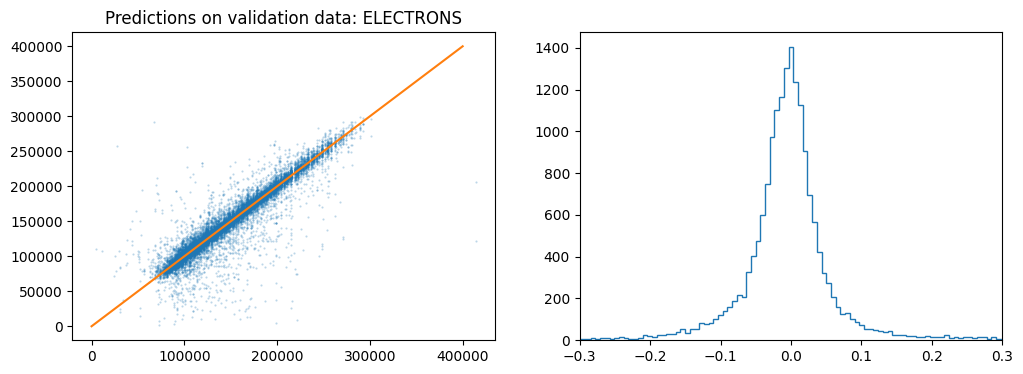

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set(title='Predictions on validation data: ELECTRONS')
ax[0].plot(y_val_electron_pred, y_val_electron, '.', ms=1, alpha=0.3)
ax[0].plot([0, 4e5], [0, 4e5])


#sns.displot((y_val_electron_pred-y_val_electron))
ax[1].hist(MAE(y_val_electron_pred, y_val_electron), bins=np.linspace(-1, 1, 300), histtype='step')
ax[1].set_xlim(-0.3, 0.3);

# Permutation importance

In [23]:
from sklearn.inspection import permutation_importance

reg_all = DecisionTreeRegressor(max_depth = 17, min_samples_split = 40) 
reg_all.fit(X_train_electron[all_features], y_train_electron)

DecisionTreeRegressor(max_depth=17, min_samples_split=40)

In [24]:
r = permutation_importance(reg_all, X_val_electron[all_features], y_val_electron, n_repeats=30, random_state=0,
                          n_jobs=-1)

In [25]:
importances_mean_sorted = sorted(r.importances_mean)[::-1] 
importances_std_sorted = sorted(r.importances_std)[::-1] 

all_features_sorted = [x for _, x in sorted(zip(r.importances_mean,all_features))][::-1] 

N_features = 20
x_array = np.linspace(0, N_features, N_features)[::-1] 

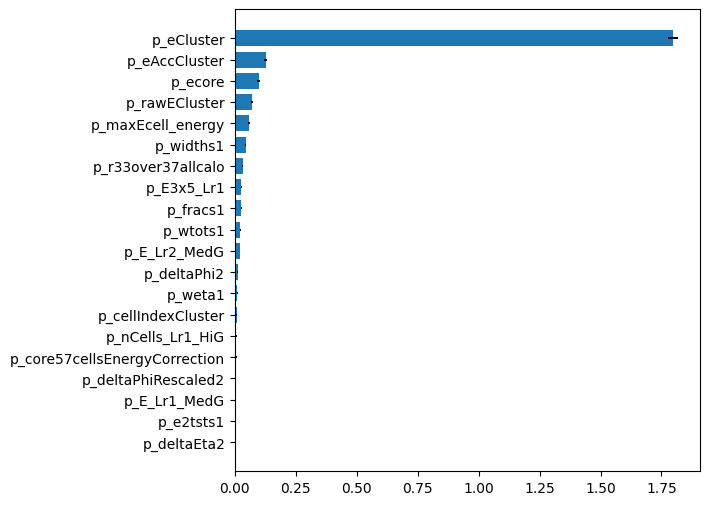

In [26]:
plt.figure(figsize=(6, 6))
plt.barh(x_array, importances_mean_sorted[:N_features])
plt.errorbar(importances_mean_sorted[:N_features], x_array, 
             xerr=importances_std_sorted[:N_features], linestyle='', color='black')
plt.yticks(ticks=x_array, labels=all_features_sorted[:N_features]);

# Hyperparameter optimization

In [212]:
reg = DecisionTreeRegressor() # splitter = 'random', max_features = 'none'

max_depth_range = [4, 5, 6, 7, 8]
min_samples_leaf_range = [35, 40, 45, 50, 55, 60, 65, 100]

parameters= {#"splitter":["best","random"],
             "max_depth" : max_depth_range,
             "min_samples_leaf" : min_samples_leaf_range,
             #"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
             #"max_features":["1.0","log2","sqrt",None],
             #"max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] 
             }

GridSearch = GridSearchCV(reg, 
                            param_grid = parameters,
                            #scoring = 'neg_mean_absolute_error',
                            cv=5,
                            verbose=1)

In [213]:
%%time

GridSearch.fit(X_val_electron[good], y_val_electron)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
CPU times: user 18.6 s, sys: 163 ms, total: 18.8 s
Wall time: 18.8 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_leaf': [35, 40, 45, 50, 55, 60, 65, 100]},
             verbose=1)

In [214]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 6, 'min_samples_leaf': 9}

In [215]:
# best model score
tuning_model.best_score_

0.8976144821799792

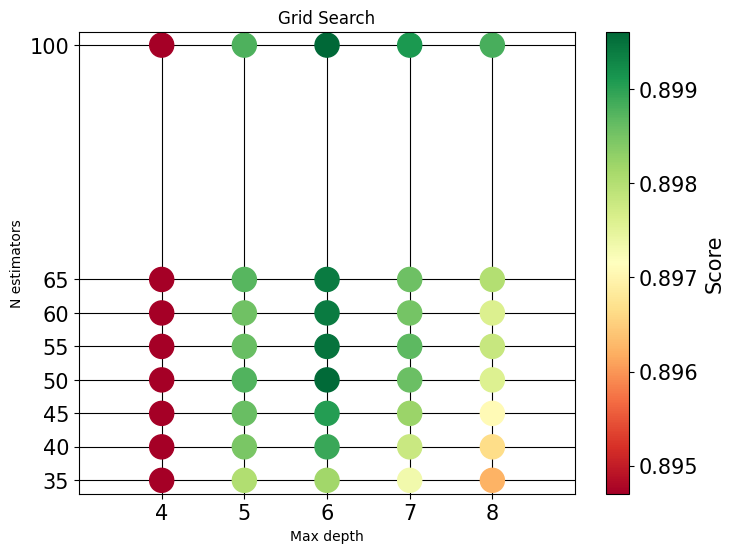

In [216]:
# parameters
GridSearch_results = pd.DataFrame(GridSearch.cv_results_)      
x1 = GridSearch_results['param_max_depth']
x2 = GridSearch_results['param_min_samples_leaf']

# color corresponding to test score
color = GridSearch_results['mean_test_score']
mini, maxi = np.min(color), np.max(color) 

# gridsearch
fig, ax = plt.subplots(figsize=(8,6))


im = ax.scatter(x1, x2, s=300, c = color, cmap='RdYlGn', zorder=2)

ax.set(xlabel='Max depth', ylabel='N estimators', title='Grid Search', 
       xlim=(max_depth_range[0]-1,max_depth_range[-1]+1), ylim=(min_samples_leaf_range[0]-2,min_samples_leaf_range[-1]+2),
       xticks = max_depth_range, yticks=min_samples_leaf_range)

ax.tick_params(axis="x", labelsize=15) 
ax.tick_params(axis="y", labelsize=15)
ax.grid(color='k')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Score', fontsize=15, x=1.7)
cbar.ax.tick_params(labelsize=15);